In [1]:
def evaluate_classifier(df_positive, df_negative, pos_label=1, neg_label=0, title_suffix="", save_path=None):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
    import os

    # Labels setzen
    df_positive = df_positive.copy()
    df_negative = df_negative.copy()
    df_positive['Label'] = pos_label
    df_negative['Label'] = neg_label

    # Kombinieren
    data = pd.concat([df_positive, df_negative], ignore_index=True)

    # Visualisierung: Histogramm
    plt.figure()
    sns.histplot(data=data, x='Score', hue='Label', kde=True, bins=50)
    plt.title(f"Distribution of Score {title_suffix}")
    plt.xlabel("Score")
    plt.ylabel("Anzahl")
    if save_path:
        filename = os.path.join(save_path, f"RNA-FM_Histogram_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    # Vorbereitung
    X = data[['Score']]
    y = data['Label']
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    labels = ["Negative", "Positive"]

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix {title_suffix}")
    if save_path:
        filename = os.path.join(save_path, f"RNA-FM_Confusion_Matrix_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    print("\n Classification Report:\n", classification_report(y, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-Curve {title_suffix}")
    plt.legend(loc="lower right")
    plt.grid(True)
    if save_path:
        filename = os.path.join(save_path, f"RNA-FM_ROC_Curve_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [2]:
import pandas as pd
import os

# Positive Dataset
df_native = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAFM_Excel/native.xlsx", usecols=['Score']))

# Negative Datasets
df_sissiz_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAFM_Excel/sissiz_mono.xlsx", usecols=['Score']))
df_sissiz_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAFM_Excel/sissiz_di.xlsx", usecols=['Score']))
df_multiperm_mono = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAFM_Excel/multiperm_mono.xlsx", usecols=['Score']))
df_multiperm_di = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAFM_Excel/multiperm_di.xlsx", usecols=['Score']))
df_aln_shuffle = pd.DataFrame(pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/RNAFM_Excel/alifoldz.xlsx", usecols=['Score']))

In [3]:
filter = 100

df_native_filterd = df_native[(df_native['Score'] >= -filter) & (df_native['Score'] <= filter)]
df_sissiz_mono_filterd = df_sissiz_mono[(df_sissiz_mono['Score'] >= -filter) & (df_sissiz_mono['Score'] <= filter)]
df_sissiz_di_filterd = df_sissiz_di[(df_sissiz_di['Score'] >= -filter) & (df_sissiz_di['Score'] <= filter)]
df_multiperm_mono_filterd = df_multiperm_mono[(df_multiperm_mono['Score'] >= -filter) & (df_multiperm_mono['Score'] <= filter)]
df_multiperm_di_filterd = df_multiperm_di[(df_multiperm_di['Score'] >= -filter) & (df_multiperm_di['Score'] <= filter)]
df_aln_shuffle_filterd = df_aln_shuffle[(df_aln_shuffle['Score'] >= -filter) & (df_aln_shuffle['Score'] <= filter)]

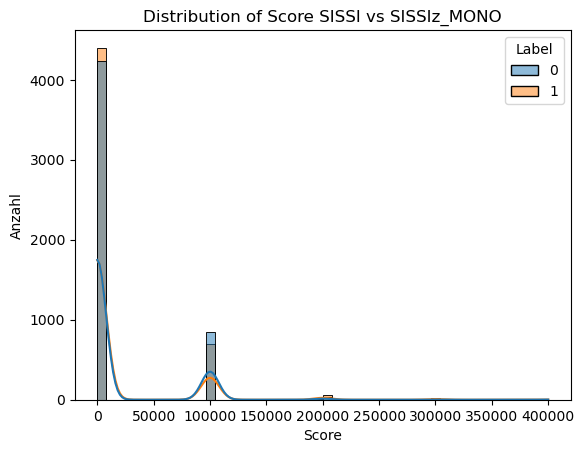

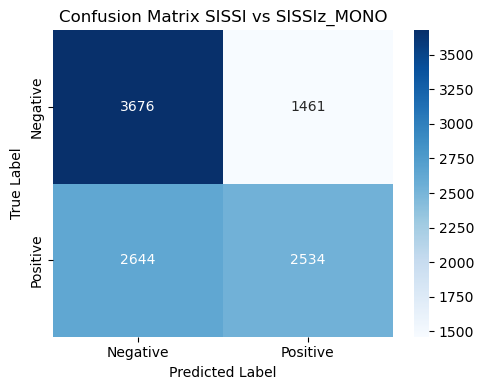


 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.72      0.64      5137
           1       0.63      0.49      0.55      5178

    accuracy                           0.60     10315
   macro avg       0.61      0.60      0.60     10315
weighted avg       0.61      0.60      0.60     10315



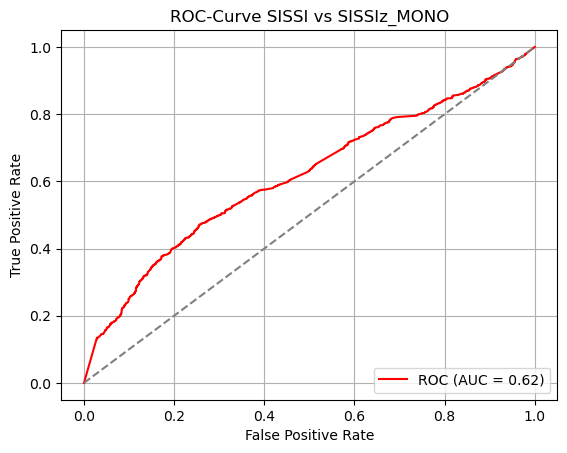

In [4]:
if not os.path.exists("D:/Masterarbeit/2.Versuch/Result/RNA-FM/"):
    os.makedirs("D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

evaluate_classifier(df_native, df_sissiz_mono, title_suffix="SISSI vs SISSIz_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

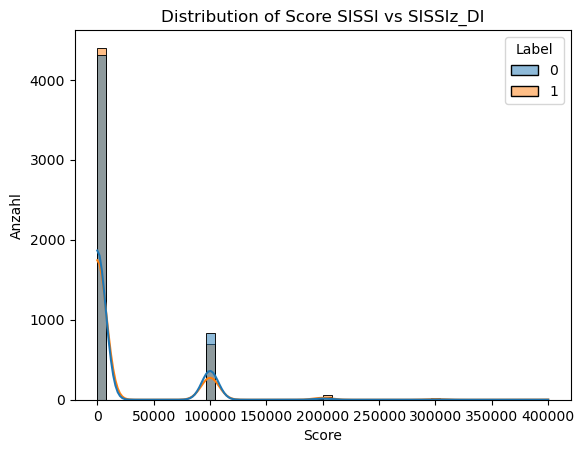

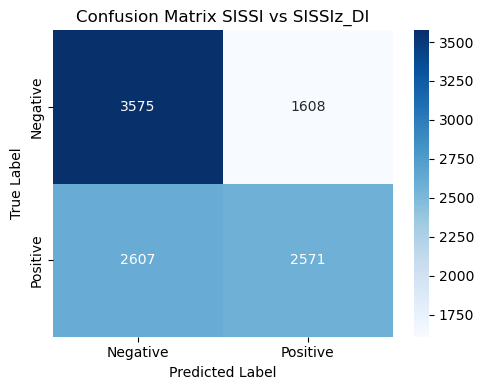


 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.69      0.63      5183
           1       0.62      0.50      0.55      5178

    accuracy                           0.59     10361
   macro avg       0.60      0.59      0.59     10361
weighted avg       0.60      0.59      0.59     10361



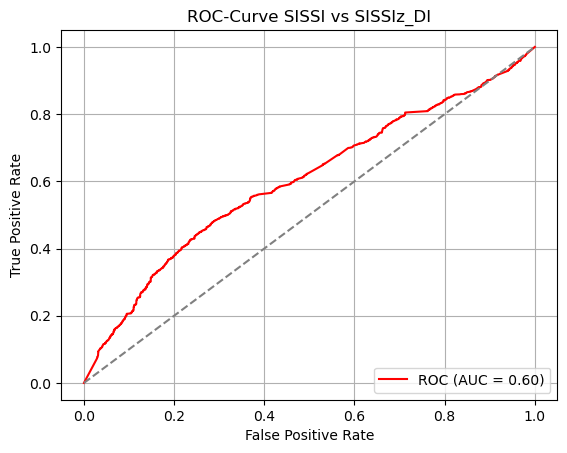

In [5]:
evaluate_classifier(df_native, df_sissiz_di, title_suffix="SISSI vs SISSIz_DI", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

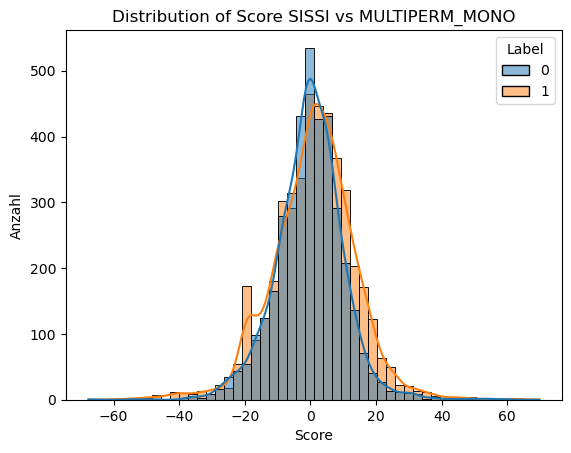

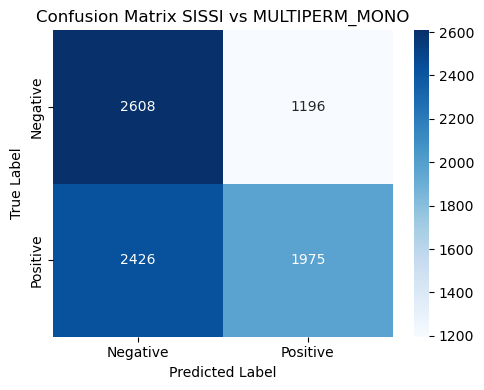


 Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.69      0.59      3804
           1       0.62      0.45      0.52      4401

    accuracy                           0.56      8205
   macro avg       0.57      0.57      0.56      8205
weighted avg       0.57      0.56      0.55      8205



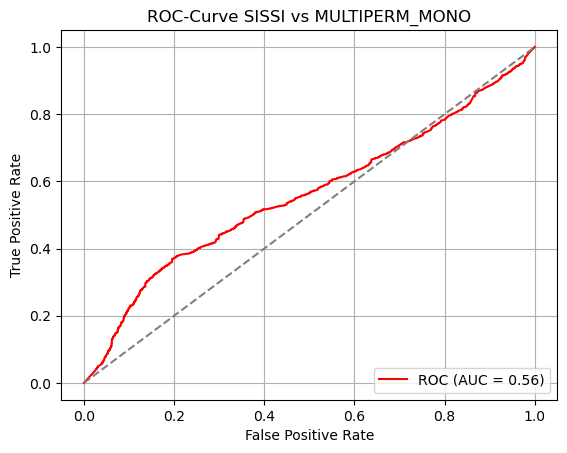

In [6]:
evaluate_classifier(df_native_filterd, df_multiperm_mono_filterd, title_suffix="SISSI vs MULTIPERM_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

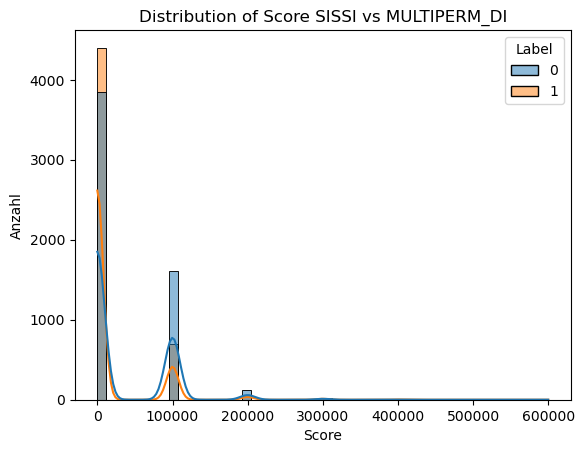

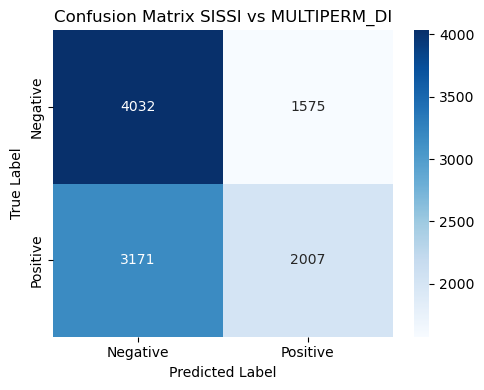


 Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.72      0.63      5607
           1       0.56      0.39      0.46      5178

    accuracy                           0.56     10785
   macro avg       0.56      0.55      0.54     10785
weighted avg       0.56      0.56      0.55     10785



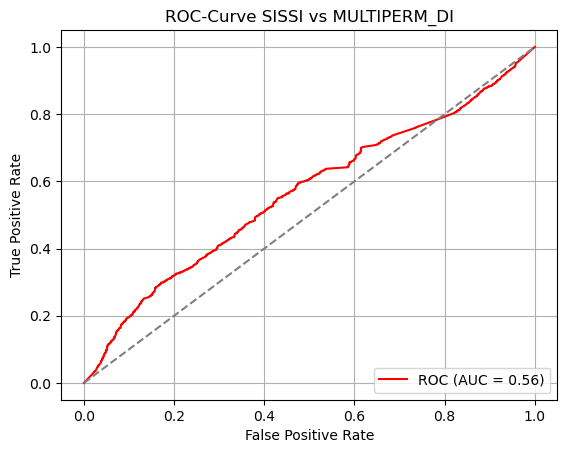

In [7]:
evaluate_classifier(df_native, df_multiperm_di, title_suffix="SISSI vs MULTIPERM_DI", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

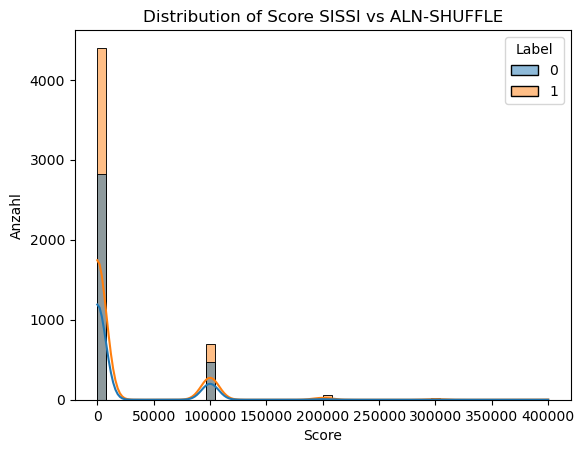

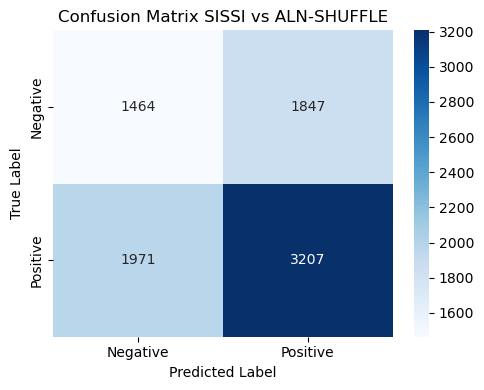


 Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.44      0.43      3311
           1       0.63      0.62      0.63      5178

    accuracy                           0.55      8489
   macro avg       0.53      0.53      0.53      8489
weighted avg       0.55      0.55      0.55      8489



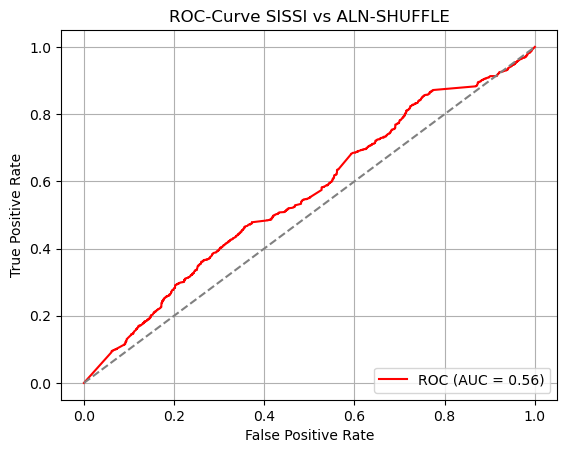

In [8]:
evaluate_classifier(df_native, df_aln_shuffle, title_suffix="SISSI vs ALN-SHUFFLE", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM/")

## With Filter


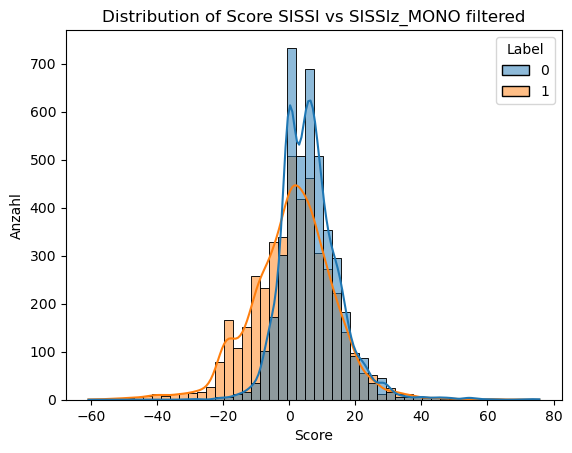

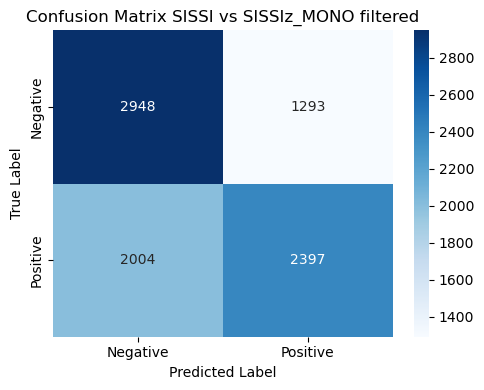


 Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.70      0.64      4241
           1       0.65      0.54      0.59      4401

    accuracy                           0.62      8642
   macro avg       0.62      0.62      0.62      8642
weighted avg       0.62      0.62      0.62      8642



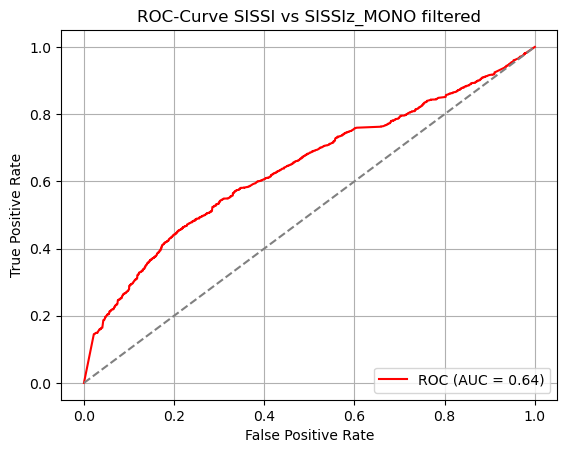

In [9]:
if not os.path.exists("D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/"):
    os.makedirs("D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

evaluate_classifier(df_native_filterd, df_sissiz_mono_filterd, title_suffix="SISSI vs SISSIz_MONO filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

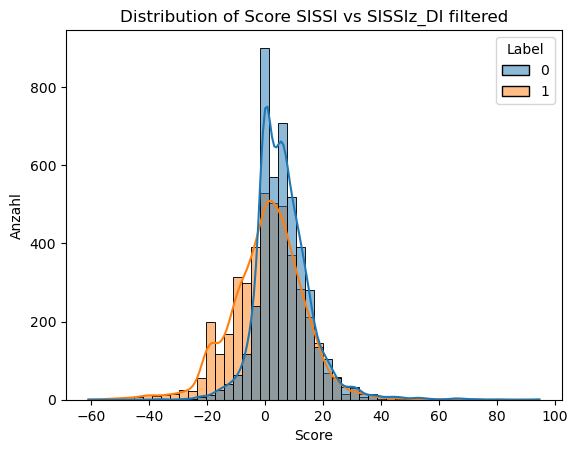

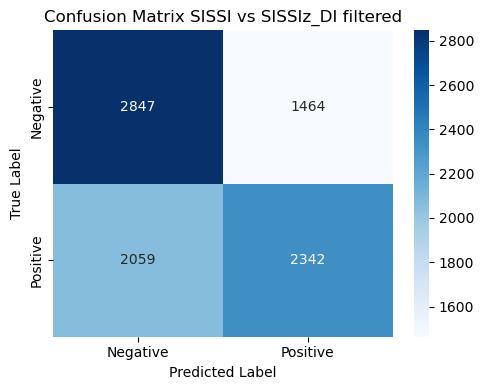


 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.66      0.62      4311
           1       0.62      0.53      0.57      4401

    accuracy                           0.60      8712
   macro avg       0.60      0.60      0.59      8712
weighted avg       0.60      0.60      0.59      8712



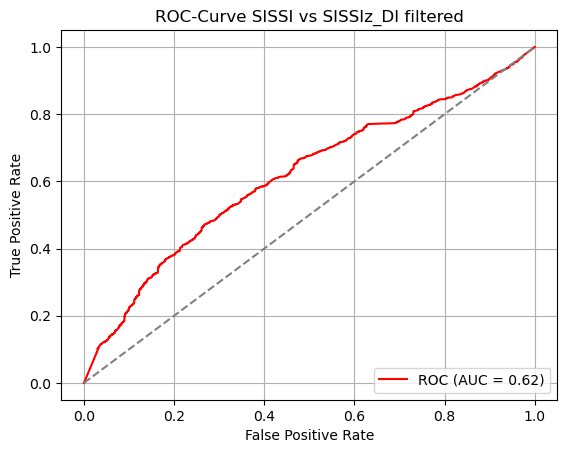

In [10]:
evaluate_classifier(df_native_filterd, df_sissiz_di_filterd, title_suffix="SISSI vs SISSIz_DI filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

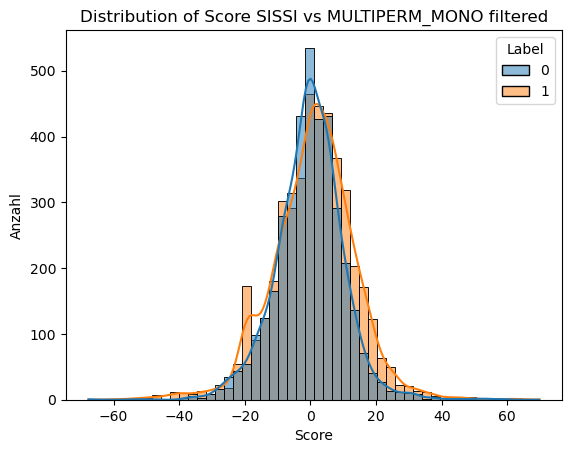

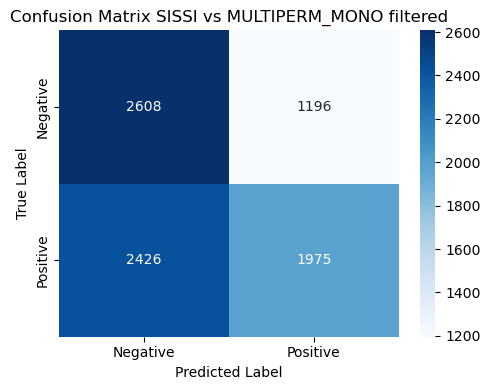


 Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.69      0.59      3804
           1       0.62      0.45      0.52      4401

    accuracy                           0.56      8205
   macro avg       0.57      0.57      0.56      8205
weighted avg       0.57      0.56      0.55      8205



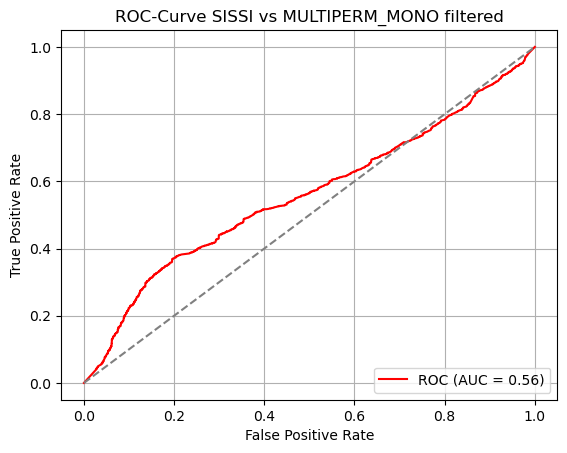

In [11]:
evaluate_classifier(df_native_filterd, df_multiperm_mono_filterd, title_suffix="SISSI vs MULTIPERM_MONO filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

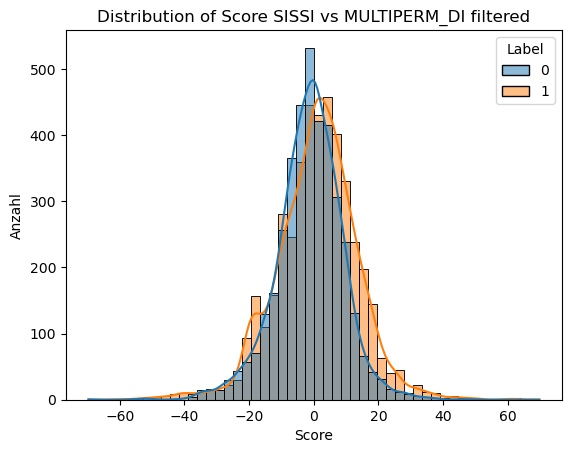

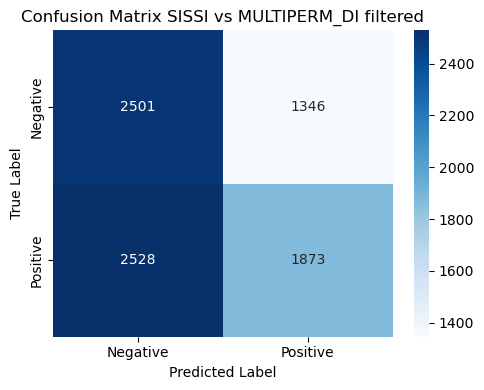


 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.65      0.56      3847
           1       0.58      0.43      0.49      4401

    accuracy                           0.53      8248
   macro avg       0.54      0.54      0.53      8248
weighted avg       0.54      0.53      0.53      8248



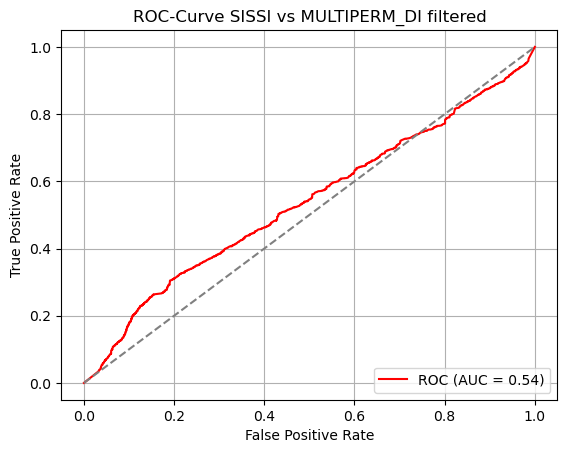

In [12]:
evaluate_classifier(df_native_filterd, df_multiperm_di_filterd, title_suffix="SISSI vs MULTIPERM_DI filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")

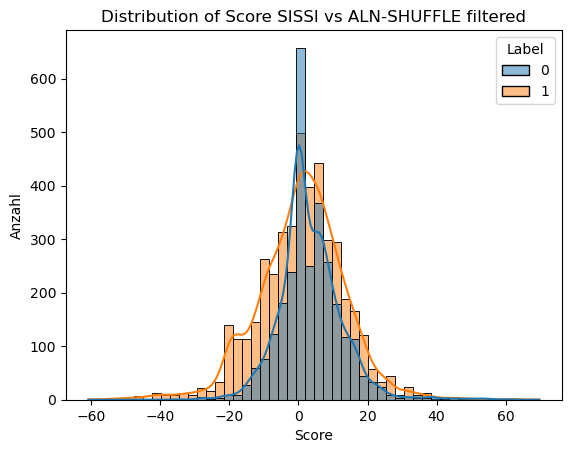

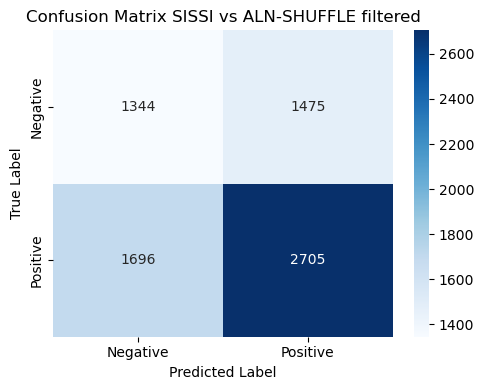


 Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.48      0.46      2819
           1       0.65      0.61      0.63      4401

    accuracy                           0.56      7220
   macro avg       0.54      0.55      0.54      7220
weighted avg       0.57      0.56      0.56      7220



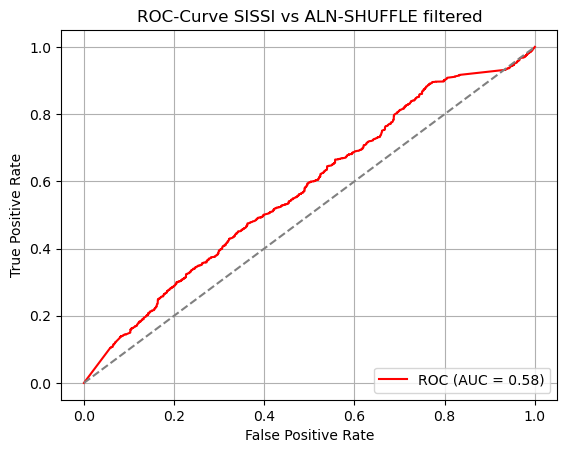

In [13]:
evaluate_classifier(df_native_filterd, df_aln_shuffle_filterd, title_suffix="SISSI vs ALN-SHUFFLE filtered", save_path="D:/Masterarbeit/2.Versuch/Result/RNA-FM_filtered/")